In [14]:
import os
import sys
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
%precision 4
plt.style.use('ggplot')

# 线性代数和线性系统（Linear Algebra and Linear Systems）

统计计算中很多问题都可以用线性代数来进行数学上的描述。本章内容主要就是回顾一些你此前在线性代数课程上面已经学过的概念。

## 联立方程（Simultaneous Equations）

假设有下面所示的 $m$ 个线性方程，其中有 $n$ 个不等式：




\begin{align*}
a_{11} x_1 + &a_{12} x_2& +& ... + &a_{1n} x_n &=& b_1\\
\vdots  && &&\vdots &= &\vdots\\
a_{m1} x_1 + &a_{m2} x_2& +& ... + &a_{mn} x_n &=&b_m 
\end{align*}


In [15]:
%%latex
可以改写成下面这种形式：

\begin{align*}
    A=\left[\begin{matrix}a_{11}&\cdots&a_{1n}\\
               \vdots & &\vdots\\
               a_{m1}&\cdots&a_{mn}\end{matrix}\right], & & 

x = \left[\begin{matrix}x_1\\
               \vdots\\
               x_n\end{matrix}\right] & \;\;\;\;\textrm{   and } &
b =  \left[\begin{matrix}b_1\\
               \vdots\\
               b_m\end{matrix}\right]
\end{align*}



<IPython.core.display.Latex object>


然后就可以把刚才的联立方程组改写成：
    
$$ Ax = b$$

这样在解矩阵方程的时候就降低了难度，然后只要找到逆矩阵$A^{-1}$ 就可以解出来整个方程组了（大概就这样哈）。$A$ 这个矩阵的各种特定性质就能提取出这个线性方程组的各种重要信息。

### 欠定方程组(Underdetermined System) (也就是方程组个数小于未知数的个数 $m<n$)

当 $m<n$ 的时候，也就是方程的个数小于未知数的个数了，那么这个线性方程组是欠定方程组（*underdetermined*）。也就是说未知数比方程组的个数还多。这种情况下，要么就是无解(这时候说方程组是不协调的*inconsistent*)，要么就有无穷个解。唯一解是肯定没可能了。

### 超定方程组（Overdetermined System）

如果 $m>n$，也就是说方程的个数多于未知数的个数了，那么这个线性方程组就是超定方程组（*overdetermined*）。也就是说方程数比未知数多了。那么这个方程组也已是不协调的(*insistent*)，或者其中某些方程式是多余的（redundant）。

分析和解线性方程组都有很多技术性的方法。我们的目标是让大家理解在各种内置函数背后的原理，以及这些函数解线性方程组的*效率*如何。
是哦续i安，来回顾一下线性代数的基本内容：

### 线性无关（Linear Independence）

当满足下列条件时，我们说一系列向量 $v_1,...,v_n$ 是线性无关的：

$$c_1v_1 + \cdots c_nv_n = 0$$
$$\iff$$
$$c_1=\cdots=c_n=0$$

换个说法，就是任何最终结果是 0 向量 的向量组合都是一个线性无关的向量集（Trivial）。

另外这也暗示了这个向量集合当中的任意一个向量都无法用集合中其他向量的组合来表示。这样来表述的话，线性无关就成了一个向量集合中不具有重复向量的一种表述方法。

定理（Fact）：任何由 $n$ 个向量组成的线性无关集合都可以张成一个$n$维的空间。（也就是说，所有可能的线性组合的集合就是$\mathbb{R}^n$。）符合这个特征的向量集合可以称为是$\mathbb{R}^n$的一个基（*basis*)。对基(*basis*)的另外一种描述就是最小张成集合（minimal spanning set)。

#### 上面的定理对线性方程组有什么影响？

**非常重要！！！**

* 如果 $A$ 是一个 $m\times n$ 的矩阵，而 $m>n$, 若全部的 $m$ 列都是线性无关的，那么这个方程组就是*超定overdetermined*且*不协调inconsistent*的。 那么这个方程组就是不能得到确定解的。在数据分析的时候这种情况经常发生，因此最小二乘法就很重要了。
 
* 如果 $A$ 是一个 $m\times n$ 的矩阵，而 $m<n$, 若全部的 $m$ 列都是线性无关的，那么这个方程组就是*欠定underdetermined*的，就有*无数个infinite*解。

* 如果 $A$ 是一个 $m\times n$ 的矩阵，而其中的一些行是线性相关的（linearly dependent），那么这个方程组就是*冗余的reducible*。其中的一些方程式就可以消除掉。

* 如果 $A$ 是一个方阵，且其中的各行都是线性无关的，那么这个方程组就有一个唯一解。($A$ 是一个可逆矩阵invertible。)


使用线性代数能获取的线性方程组信息还有很多很多，所以咱们接下来要复习一些基本内容。

### 向量的范数与距离（Norms and Distance）

 一个向量 $v$ 的范数'norm', 表示为 $||v||$，也就是这个向量的长度。对于一个多维向量：
$$v = \left(v_1,...,v_n\right)$$
$v$ 的范数可用如下方法获得：
$$||v|| = \sqrt{v_1^2+...+v_n^2}$$

两个向量之间的距离，也就是差向量的长度：
$$d(v,w) = ||v-w||$$

#### 样例

In [16]:
import numpy as np
from scipy import linalg


# 求一个向量的范数

v = np.array([1,2])
linalg.norm(v)

2.2361

In [17]:
# 计算两个向量之间的距离

w = np.array([1,1])
linalg.norm(v-w)

1.0000

### 内积（Inner Products）

内积和范数与距离的关系非常密切。两个 $n$ 维向量 $v$ 和 $w$ 的标准的内积如下所示：

$$<v,w> = v_1w_1+...+v_nw_n$$

也就是说，内积就是对应项目相乘之后加到一起。某些特殊的矩阵也能定义内积，这些后面再说。

任何的内积也都可以确定一种范数：

$$||v|| = <v,v>^{\frac12}$$

#### 样例

In [18]:
v.dot(w)

3

### 外积（Outer Products）

这里我们会注意到，内积实际上就是两个矩阵相乘，也就是一个$1\times n$ 向量和另外一个 $n\times 1$ 这两个向量。所以，就也可以改写成下面这样：

$$<v,w> = v^tw$$

而两个向量的 *外积outer product* 则正好是相反的，如下所示：

$$v\otimes w = vw^t$$

注意这里是把$v$ 和 $w$ 看作例列向量*column*。所以内积的结果就是一个标量*scalar*，而外积的结果是一个矩阵*matrix*。

#### 样例

In [19]:
np.outer(v,w)

array([[1, 1],
       [2, 2]])

**扩展**: 协方差矩阵（covariance matrix）就是一个外积。

In [20]:
import numpy as np

# 对 p 个变量进行 n 次观测
n, p = 10, 4
v = np.random.random((p,n))

In [21]:
# 协方差矩阵（covariance matrix）就是一个 p×p 的矩阵
np.cov(v)

array([[ 0.0716, -0.0352,  0.0228,  0.0099],
       [-0.0352,  0.0698, -0.0116,  0.0064],
       [ 0.0228, -0.0116,  0.1009, -0.0239],
       [ 0.0099,  0.0064, -0.0239,  0.0842]])

In [22]:
# From the definition, the covariance matrix 
# is just the outer product of the normalized 
# matrix where every variable has zero mean
# divided by the number of degrees of freedom

# 根据定义来看，协方差矩阵就是标准化后的矩阵的外积，标准化就是使得所有的值除以自由度后的均值为 0 

w = v - v.mean(1)[:, np.newaxis]
w.dot(w.T)/(n - 1)

array([[ 0.0716, -0.0352,  0.0228,  0.0099],
       [-0.0352,  0.0698, -0.0116,  0.0064],
       [ 0.0228, -0.0116,  0.1009, -0.0239],
       [ 0.0099,  0.0064, -0.0239,  0.0842]])

### 矩阵的迹和行列式（Trace and Determinant）

The trace of a matrix $A$ is the sum of its diagonal elements.  It is important for a couple of reasons:

矩阵 $A$ 的迹就是对角元素的和。这个变量很重要，因为：

* 对于一个矩阵来说，迹是一个 *不变量（invariant）*，即便改变矩阵的基（后面会更深入地讲）。
* 矩阵的迹定义了矩阵的一种范数（还是后面再深入讲）。


矩阵的行列式的定义大概是对矩阵中所有元素的某种排列的交替求和（alternating sum of permutations of the elements of a matrix），（形式上行列式可以看作是取自不同行不同列的n个元素的乘积再作代数和，具体定义大家参考教材去吧，这里根本也就没说，只是随便一提而已，并不是权威定义）。眼下就先不弄那么细致了。先看看一个$2\times 2$ 矩阵的行列式是：

$$\left|\begin{matrix}a_{11} & a_{12}\\a_{21} & a_{22}\end{matrix}\right| = a_{11}a_{22} - a_{12}a_{21}$$

稍作扩展（minor expansion），就可以推广到 $n \times n 的矩阵上去了。这部分内容自己查去吧。咱们用 Python 中的 numpy 来计算行列式都有现成的工具，如下所示：

``np.linalg.det(A)``


行列式最重要的性质如下所示：

* 跟迹类似，行列式也是一个不变量，不随基变化而变化。
* 如果一个 $n\times n$ 的矩阵 $A$ 的行列式 det$(A)\neq 0$ $\iff$ 那么这个矩阵就是可逆矩阵 。
* 如果det$(A)\neq 0$ $\iff$ 那么这个 $n\times n$ 矩阵 $A$ 的行或者列就都是线性无关的。

### 矩阵的列空间/行空间/秩以及核（Column space, Row space, Rank and Kernel）

设 $A$ 是一个 $m\times n$ 矩阵。然后就可以把 $A$ 的列当作向量，例如 $\textbf{a_1},...,\textbf{a_n}$等等。然后这些所有的列向量$\textbf{a_i}$进行线性组合得到的空间就称为矩阵$A$的*列空间column space* 。然后，如果列向量 $\textbf{a_1},...,\textbf{a_n}$ 这些都是*线性无关的linearly independent*，那么列空间的维度就是 $n$ 了。如果不是这样，那么列空间的维度就是线性无关的列向量$\textbf{a_i}$所组成的最大集合（maximal set）的维度。行空间与此同理，无非是使用的是矩阵 $A$ 的行向量而已。

矩阵*A*的*秩（rank）*就是其列空间和行空间的维数。对任何矩阵来说都是这样。秩卡一理解为对线性方程组的非退化性（non-degeneracy）的一种量度，也就是由矩阵$A$所确定的*线性变换的图像维度（dimension of the image of the linear transformation）*

矩阵*A*的*核Kernel*，是一个这个矩阵 $A$ 所表示的线性变换空间映射到零的空间的维数（dimension of the space mapped to zero under the linear transformation that $A$ represents）。一个线性变换的*核kernel*的维度数也叫做 *nullity*。


指数定理（Index theorem）：
对于一个 $m\times n$ 矩阵 $A$, 
rank($A$) + nullity($A$) = $n$.

（译者注：这个核的概念我还真头一次见到，网上搜到了一个解释如下：满足线性方程AX=0的解组成的集合就叫矩阵A的核，A的核是子空间，也叫A的零空间,它的维数加上A的秩等于A的阶数。）

### 将矩阵理解为线性变换（Matrices as Linear Transformations）

咱们来考虑一下这个问题：一个矩阵到底对一个向量*做*了什么？矩阵的操作有一种*几何 geometric*表述。当我们对一个向量进行操作的时候，通常就是旋转rotate,对称 reflect, 扩展 dilate 或者这几种操作的一些组合。矩阵也是这样对一个向量进行*变换 transform*，使之成为一个新的向量。这就是所谓的*线性变换 linear transformation*

下面是一些重要的定理：

* 任意的一个矩阵，都定义了一个线性变换
* 一个线性变换的矩阵形式的表述是不唯一的
* 定义一个线性变换只需要考虑其对基向量*basis*的操作


Suppose we have a matrix $A$ that defines some transformation.  We can take any invertible matrix $B$ and

$$BAB^{-1}$$

defines the same transformation.  This operation is called a *change of basis*, because we are simply expressing the transformation with respect to a different basis.

This is what we do in PCA.  We express the matrix in a basis of eigenvectors (more on this later).

#### Example:

Let $f(x)$ be the linear transformation that takes $e_1=(1,0)$ to $f(e_1)=(2,3)$ and $e_2=(0,1)$ to $f(e_2) = (1,1)$.  A matrix representation of $f$ would be given by:

$$A = \left(\begin{matrix}2 & 1\\3&1\end{matrix}\right)$$

This is the matrix we use if we consider the vectors of $\mathbb{R}^2$ to be linear combinations of the form 

$$c_1 e_1 + c_2 e_2$$

Now, consider a second pair of (linearly independent) vectors in $\mathbb{R}^2$, say $v_1=(1,3)$ and $v_2=(4,1)$. We first find the transformation that takes $e_1$ to $v_1$ and $e_2$ to $v_2$.  A matrix representation for this is:

$$B = \left(\begin{matrix}1 & 4\\3&1\end{matrix}\right)$$

Our original transformation $f$ can be expressed with respect to the basis $v_1, v_2$ via

$$B^{-1}AB$$

In [23]:


A = np.array([[2,1],[3,1]])  # transformation f in standard basis
e1 = np.array([1,0])         # standard basis vectors e1,e2
e2 = np.array([0,1])

print(A.dot(e1))             # demonstrate that Ae1 is (2,3)
print(A.dot(e2))             # demonstrate that Ae2 is (1,1) 
                              
# new basis vectors
v1 = np.array([1,3])         
v2 = np.array([4,1])

# How v1 and v2 are transformed by A
print("Av1: ")
print(A.dot(v1))   
print("Av2: ")
print(A.dot(v2))

# Change of basis from standard to v1,v2
B = np.array([[1,4],[3,1]])
B_inv = linalg.inv(B)

print("B B_inv ")
print(B.dot(B_inv))   # check inverse

# transform e1 under change of coordinates
T = B_inv.dot(A.dot(B))        # B^{-1} A B  
coeffs = T.dot(e1)

print("Compare to Av1: ", coeffs[0]*v1 + coeffs[1]*v2)




[2 3]
[1 1]
Av1: 
[5 6]
Av2: 
[ 9 13]
B B_inv 
[[  1.0000e+00   0.0000e+00]
 [  5.5511e-17   1.0000e+00]]
('Compare to Av1: ', array([ 5.,  6.]))


In [24]:
def plot_vectors(vs):
    """Plot vectors in vs assuming origin at (0,0)."""
    n = len(vs)
    X, Y = np.zeros((n, 2))
    U, V = np.vstack(vs).T
    plt.quiver(X, Y, U, V, range(n), angles='xy', scale_units='xy', scale=1)
    xmin, xmax = np.min([U, X]), np.max([U, X])
    ymin, ymax = np.min([V, Y]), np.max([V, Y])
    xrng = xmax - xmin
    yrng = ymax - ymin
    xmin -= 0.05*xrng
    xmax += 0.05*xrng
    ymin -= 0.05*yrng
    ymax += 0.05*yrng
    plt.axis([xmin, xmax, ymin, ymax])

In [25]:
e1 = np.array([1,0])
e2 = np.array([0,1])
A = np.array([[2,1],[3,1]])

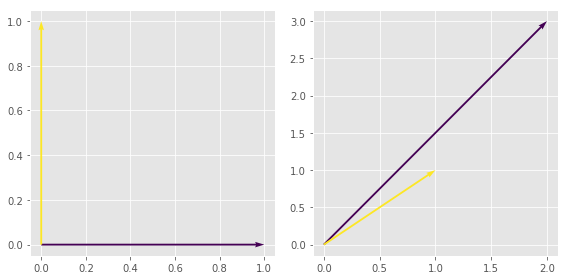

In [26]:
# Here is a simple plot showing Ae_1 and Ae_2
# You can show other transofrmations if you like

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plot_vectors([e1, e2])
plt.subplot(1,2,2)
plot_vectors([A.dot(e1), A.dot(e2)])
plt.tight_layout()

### Special Matrices

Some matrices have interesting properties that allow us either simplify the underlying linear system or to understand more about it. 

#### Square Matrices

Square matrices have the same number of columns (usually denoted $n$).  We refer to an arbitrary square matrix as and $n\times n$ or we refer to it as a 'square matrix of dimension $n$'.  If an $n\times n$ matrix $A$ has *full rank* (i.e. it has rank $n$), then $A$ is invertible, and its inverse is unique.  This is a situation that leads to a unique solution to a linear system.

#### Diagonal Matrices

A diagonal matrix is a matrix with all entries off the diagonal equal to zero.  Strictly speaking, such a matrix should be square, but we can also consider rectangular matrices of size $m\times n$ to be diagonal, if all entries $a_{ij}$ are zero for $i\neq j$

#### Symmetric and Skew Symmetric

A matrix $A$ is (skew) symmetric iff $a_{ij} = (-)a_{ji}$.

Equivalently, $A$ is (skew) symmetric iff

$$A = (-)A^T$$

#### Upper and Lower Triangular

A matrix $A$ is (upper|lower) triangular if $a_{ij} = 0$ for all $i (>|<) j$

#### Orthogonal and Orthonormal

A matrix $A$ is *orthogonal* iff

$$A A^T = I$$

In other words, $A$ is orthogonal iff 

$$A^T=A^{-1}$$

Fact: The rows and columns of an orthogonal matrix are an orthonormal set of vectors.


#### Positive Definite

Positive definite matrices are an important class of matrices with very desirable properties. A square matrix $A$ is positive definite if

$$u^TA u > 0$$

for any non-zero n-dimensional vector $u$.

A symmetric, positive-definite matrix $A$ is a positive-definite matrix such that

$$A = A^T$$

IMPORTANT: 

* Symmetric, positive-definite matrices have 'square-roots' (in a sense)
* Any symmetric, positive-definite matrix is *diagonizable*!!!
* Co-variance matrices are symmetric and positive-definite


Now that we have the basics down, we can move on to numerical methods for solving systems - aka matrix decompositions.

<font color=red>Exercises</font>
----

**1**. Determine whether the following system of equations has no solution, infinite solutions or a unique solution *without solving the system*

$$\begin{eqnarray*}
x+2y-z+w &=& 2\\
3x-4y+2 w &=& 3\\
2y+z &=& 4\\
2x+2y-3z+2w&=&0\\
-2x+6y-z-w&=&-1
\end{eqnarray*}$$

**2**. Let $f(x)$ be a linear transformation of $\mathbb{R}^3$ such that
$$\begin{eqnarray*}
f(e_1) &=& (1,1,3)\\
f(e_2) &=& (1,0,4)\\
f(e_3) &=& (0,2,1)
\end{eqnarray*}$$

* Find a matrix representation for $f$. 
* Compute the matrix representation for $f$ in the basis$$\begin{eqnarray*}
v_1 &=& (2,3,3)\\
v_2 &=& (8,5,2)\\
v_3 &=& (1,0,5)
\end{eqnarray*}$$
